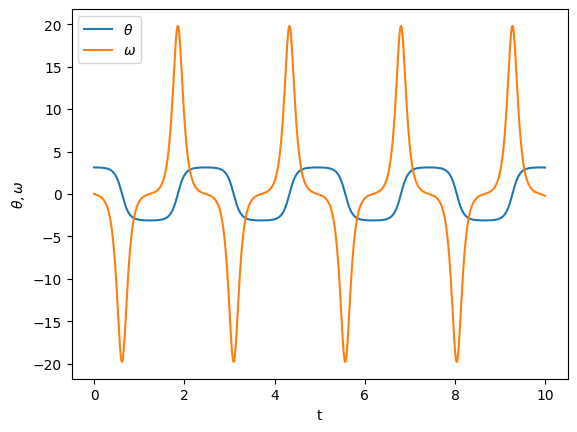

In [6]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

g = 9.81  # gravity
l = 0.1   # arm length of pendulum [m]
theta0 = 179.0 # initial arm position [degrees]

a = 0.0   # start time
b = 10.0  # end time
N = 1000
h = (b-a)/N

# In-class problem: define function for an equivalent set of two
# first-order equations
def f(r,t):
    theta, omega = r
    dtheta = omega
    domega = -g/l * np.sin(theta)
    return np.array([dtheta,domega])

tpoints = np.arange(a,b,h)
r = np.zeros((N,2))
r[0] = [np.pi * theta0/180.0, 0.0]

# Loop over time to solve for x and y, which will be stored in r[]
for i,t in enumerate(tpoints[1:],1):
    k1 = h * f(r[i-1], t)
    k2 = h * f(r[i-1]+0.5*k1, t+0.5*h)
    k3 = h * f(r[i-1]+0.5*k2, t+0.5*h)
    k4 = h * f(r[i-1]+k3, t+h)
    r[i] = r[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

plt.plot(tpoints, r[:,0], label=r'$\theta$')
plt.plot(tpoints, r[:,1], label=r'$\omega$')
plt.xlabel("t")
plt.ylabel(r"$\theta, \omega$")
plt.legend()
plt.show()
